In [5]:
import random
import time
import tracemalloc

import numpy as np
from optimize.util import optimize
import regression as reg
from matplotlib import pyplot as plt
import tests as tests
from scipy.optimize import minimize, least_squares
import util

In [6]:
test = tests.create_test(func=util.plus(lambda x:util.polynomial(5)(x)(np.array([1., 0., -50., 0., 1.])), util.random_function(1000)),
                           model_name='lin',
                           point=np.array([10000., 1000., 1000., 10000., -1000.]),
                           params=2,
                           begin=-10,
                           end=10,
                           steps=1000
                           )

In [7]:
print("model =", test.model)
print("start = ", test.init_point)
print("function = ", test.func)

model = (<function lin_test at 0x000002A4CF80F4C0>, <function lin_jac at 0x000002A4CF80F550>)
start =  [10000.  1000.]
function =  <function combine.<locals>.<lambda> at 0x000002A4F3526F70>


In [8]:
func, jac = test.model
gn =  optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='GAUSS-NEWTON')
pdl = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='POWELL-DOG-LEG')
bfgs = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='BFGS')
lbfgs = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='L-BFGS')
sgd = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='SGD')
mnt = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='MOMENTUM')
nst = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='NESTEROV')
agd = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='ADA-GRAD')
rms = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='RMS-PROP')
adam = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='ADAM')

eps = 1e-8
max_iters = 2000
learning_rate = 0.01
batch_size = 1

res = {
    'GAUSS-NEWTON': gn(test.X, test.Y, test.init_point, eps, max_iters),
    'POWELL-DOG-LEG': pdl(test.X, test.Y, test.init_point, 1000, eps, max_iters),
    'BFGS': bfgs(test.X, test.Y, test.init_point, eps, max_iters),
    'L-BFGS': lbfgs(test.X, test.Y, test.init_point, 0.5, 100, eps, max_iters),
    'SGD': sgd(test.X, test.Y, test.init_point, eps, learning_rate, batch_size, max_iters),
    'MOMENTUM': mnt(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters),
    'NESTEROV': nst(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters)
}

# agdr, agdi = agd(test.X, test.Y, test.init_point, eps, learning_rate, batch_size, max_iters)
# rmsr, rmsi = rms(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters)
# adamr, adami = adam(test.X, test.Y, test.init_point, 0.9, 0.99, eps, learning_rate, batch_size, max_iters)

(7769677, 8026677)
Filename: C:\Workspace\study\sem-4\metopts-labs\lab_3\solution\optimize\gauss_newton.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    12 163.9219 MiB 163.9219 MiB           1   @profile(precision=4)
    13                                         def gauss_newton(func, jacobian, start, eps, max_iter):
    14 163.9219 MiB   0.0000 MiB           1       trace = [start]
    15                                         
    16 163.9219 MiB   0.0000 MiB           1       actions = 0
    17 163.9219 MiB   0.0000 MiB           1       iter = 0
    18                                         
    19 163.9219 MiB   0.0000 MiB           1       tracemalloc.start()
    20 163.9219 MiB   0.0000 MiB           1       start_time = time.time()
    21                                         
    22 163.9219 MiB   0.0000 MiB           1       param = np.array(start)
    23 163.9219 MiB   0.0000 MiB           2       for i in range(max_iter):
    24 163.9219 MiB   0.0

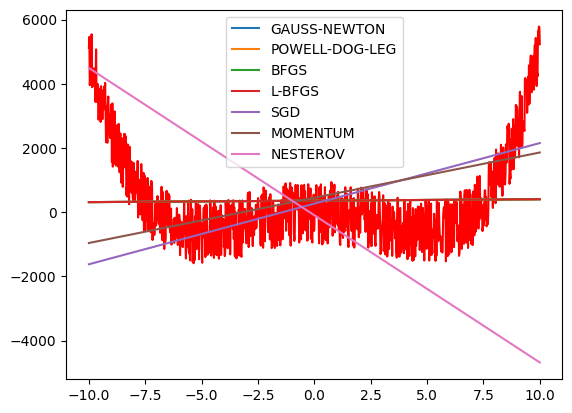

In [9]:
X = np.linspace(test.begin, test.end, test.steps)
plt.plot(test.X, test.Y, 'r-')
for name in res:
    Y = func(X)(res[name][0])
    plt.plot(X, Y, label=name)
plt.legend()

In [10]:
for name in res:
    point, info = res[name]
    print("Method:", name, end='\t')
    print("Point:", point, end='\t')
    print("Error:", sum((test.Y - test.model[0](test.X)(point)) ** 2), end='\t')
    
    from tests import ProcInfo
    print("T:", info.time, end='\t')
    print("M:", info.memory, end='\t')
    print("I:", info.iterations)

Method: GAUSS-NEWTON	Point: [  4.50924981 358.14485692]	Error: 2138238130.1550467	T: 0.0020046234130859375	M: (7769677, 8026677)	I: 2
Method: POWELL-DOG-LEG	Point: [  4.50924981 358.14485692]	Error: 2138238130.1550465	T: 0.01203155517578125	M: (4632, 53120)	I: 12
Method: BFGS	Point: [  4.50924814 358.14485845]	Error: 2138238130.155042	T: 4.175807237625122	M: (66839, 100591)	I: 453
Method: L-BFGS	Point: [  4.50924981 358.14485692]	Error: 2138238130.1550465	T: 0.009023904800415039	M: (7128, 39648)	I: 5
Method: SGD	Point: [188.85169614 264.92212322]	Error: 3281934269.0660553	T: 0.8484268188476562	M: (290532, 292823)	I: 2000
Method: MOMENTUM	Point: [141.01309693 449.18684436]	Error: 2768880246.438369	T: 0.8678317070007324	M: (278998, 281289)	I: 1999
Method: NESTEROV	Point: [-458.77979345  -95.78611412]	Error: 9513172816.003036	T: 0.8809986114501953	M: (278610, 280901)	I: 1999


In [11]:
x0 = test.init_point
func, jac = test.model
start_time = time.time()
tracemalloc.start()
result = least_squares(lambda x: np.sqrt(2) * (test.Y - func(test.X)(x)), x0, jac=jac(test.X))
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [12]:
end_time - start_time, memory, result

(0.00400996208190918,
 (46887, 147659),
      message: `ftol` termination condition is satisfied.
      success: True
       status: 2
          fun: [ 6.797e+03  7.282e+03 ...  7.580e+03  6.831e+03]
            x: [ 4.513e+00  3.581e+02]
         cost: 2138238131.8011086
          jac: [[ 1.000e+01 -1.000e+00]
                [ 9.980e+00 -1.000e+00]
                ...
                [-9.980e+00 -1.000e+00]
                [-1.000e+01 -1.000e+00]]
         grad: [ 1.576e+02 -5.048e+01]
   optimality: 157.6395594814967
  active_mask: [ 0.000e+00  0.000e+00]
         nfev: 13
         njev: 13)

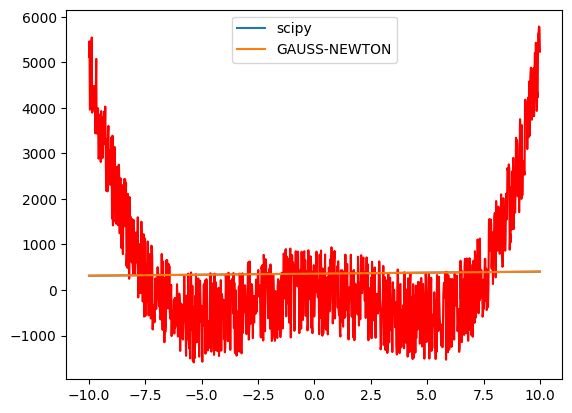

In [13]:
Y = func(X)(result.x)
plt.plot(X, Y, label='scipy')
plt.plot(test.X, test.Y, 'r-')
plt.plot(X, func(X)(res['GAUSS-NEWTON'][0]), label='GAUSS-NEWTON')
plt.legend()

In [14]:
result.x - res['GAUSS-NEWTON'][0]

array([ 0.00333736, -0.03569389])

In [15]:
result

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 6.797e+03  7.282e+03 ...  7.580e+03  6.831e+03]
           x: [ 4.513e+00  3.581e+02]
        cost: 2138238131.8011086
         jac: [[ 1.000e+01 -1.000e+00]
               [ 9.980e+00 -1.000e+00]
               ...
               [-9.980e+00 -1.000e+00]
               [-1.000e+01 -1.000e+00]]
        grad: [ 1.576e+02 -5.048e+01]
  optimality: 157.6395594814967
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 13
        njev: 13

In [16]:
result.cost

2138238131.8011086

In [17]:
sum((test.Y - test.model[0](test.X)(res['GAUSS-NEWTON'][0])) ** 2)

2138238130.1550467

In [18]:
sum((test.Y - test.model[0](test.X)(result.x)) ** 2)

2138238131.8011072

In [19]:
start_time = time.time()
tracemalloc.start()
other = least_squares(lambda x: np.sqrt(2) * (test.Y - func(test.X)(x)), x0, jac=jac(test.X),
                      bounds=(-10000, 10000))
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

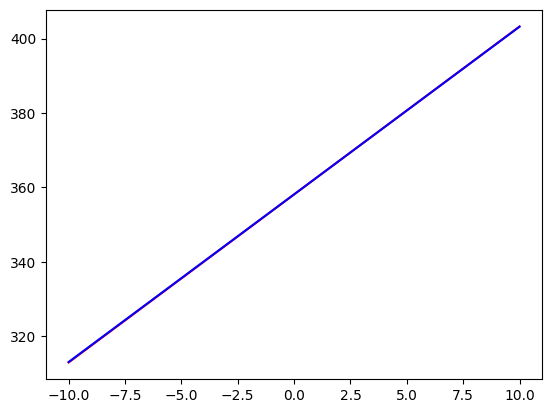

In [20]:
util.show(X, func(X)(result.x), X, func(X)(other.x))

In [21]:
end_time-start_time, memory, other

(0.0055315494537353516,
 (29642, 138900),
      message: `ftol` termination condition is satisfied.
      success: True
       status: 2
          fun: [ 6.797e+03  7.281e+03 ...  7.580e+03  6.831e+03]
            x: [ 4.503e+00  3.581e+02]
         cost: 2138238131.3540163
          jac: [[ 1.000e+01 -1.000e+00]
                [ 9.980e+00 -1.000e+00]
                ...
                [-9.980e+00 -1.000e+00]
                [-1.000e+01 -1.000e+00]]
         grad: [-2.826e+02  2.510e+00]
   optimality: 2825047.7181993383
  active_mask: [0 0]
         nfev: 15
         njev: 15)

In [22]:
fun = reg.regression_function(test.model[0], test.X, test.Y)
r = reg.regression(test.model[0], test.X, test.Y)
grad = reg.grad(test.X, test.model[1], r)
hess = reg.hessian(test.X, test.model[1])

In [23]:
start_time = time.time()
tracemalloc.start()
result_pdl = minimize(fun,
                      x0,
                      method='dogleg',
                      jac=grad,
                      hess=hess,
                      options={'initial_trust_radius': 1000,
                               'max_trust_radius': 10000})
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [24]:
end_time - start_time, memory, result_pdl

(0.006015777587890625,
 (25262, 74672),
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2138238130.155048
        x: [ 4.509e+00  3.581e+02]
      nit: 4
      jac: [-3.999e-08 -7.032e-09]
     nfev: 5
     njev: 5
     nhev: 4
     hess: [[ 6.680e+04 -9.095e-13]
            [-9.095e-13  2.000e+03]])

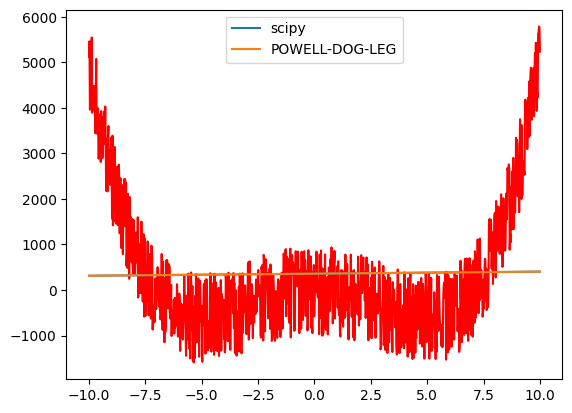

In [25]:
plt.plot(test.X, test.Y, 'r-')
plt.plot(X, func(X)(result_pdl.x), label='scipy')
plt.plot(X, func(X)(res['POWELL-DOG-LEG'][0]), label='POWELL-DOG-LEG')
plt.legend()

In [26]:
start_time = time.time()
tracemalloc.start()
other_pdl = minimize(fun,
                      x0,
                      method='dogleg',
                      jac=grad,
                      hess=hess,
                      options={'initial_trust_radius': 1000,
                               'max_trust_radius': 10000})
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [27]:
end_time - start_time, memory, other_pdl

(0.005733013153076172,
 (3740, 53550),
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2138238130.155048
        x: [ 4.509e+00  3.581e+02]
      nit: 4
      jac: [-3.999e-08 -7.032e-09]
     nfev: 5
     njev: 5
     nhev: 4
     hess: [[ 6.680e+04 -9.095e-13]
            [-9.095e-13  2.000e+03]])

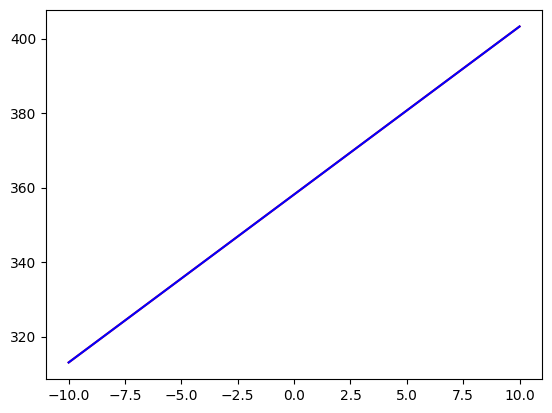

In [28]:
util.show(X, func(X)(result_pdl.x), X, func(X)(other_pdl.x))

In [29]:
start_time = time.time()
tracemalloc.start()
result_bfgs = minimize(fun,
                       x0,
                       method='BFGS',
                       jac=grad)
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [30]:
end_time - start_time, memory, result_bfgs

(0.01303410530090332,
 (6500, 41401),
   message: Optimization terminated successfully.
   success: True
    status: 0
       fun: 2138238130.155047
         x: [ 4.509e+00  3.581e+02]
       nit: 5
       jac: [-2.387e-08 -9.954e-09]
  hess_inv: [[ 1.497e-05 -2.965e-21]
             [-2.965e-21  5.000e-04]]
      nfev: 15
      njev: 15)

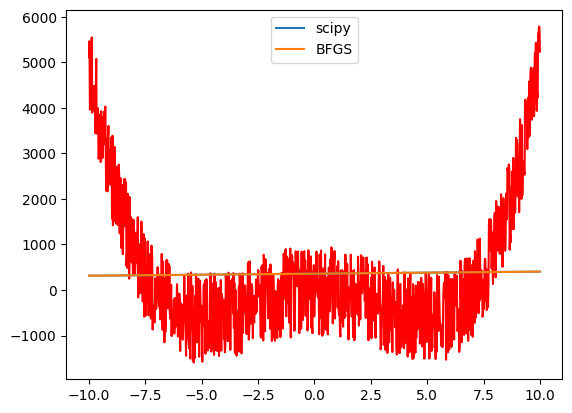

In [31]:
plt.plot(test.X, test.Y, 'r-')
plt.plot(X, func(X)(result_bfgs.x), label='scipy')
plt.plot(X, func(X)(res['BFGS'][0]), label='BFGS')
plt.legend()

In [32]:
reg.regression_function(test.model[0], test.X, test.Y)(result_bfgs.x)

2138238130.155047

In [33]:
reg.regression_function(test.model[0], test.X, test.Y)(res['BFGS'][0])

2138238130.155042

In [34]:
start_time = time.time()
tracemalloc.start()
other_bfgs = minimize(fun,
                      x0,
                      method='BFGS',
                      jac=grad,
                      options={
                          'finite_diff_rel_step': [(-0.1, 0.1) for i in range(len(x0))]
                      })
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

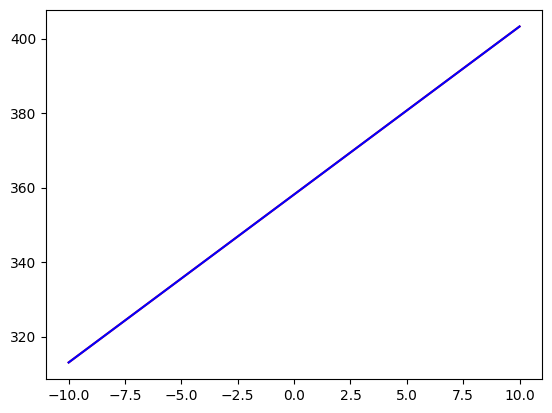

In [35]:
util.show(X, func(X)(result_bfgs.x), X, func(X)(other_bfgs.x))

In [36]:
start_time = time.time()
tracemalloc.start()
result_lbfgs = minimize(fun, x0, method='L-BFGS-B', jac=grad)
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

In [37]:
end_time - start_time, memory, result_lbfgs

(0.020052671432495117,
 (16795, 49785),
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 2138238130.155045
         x: [ 4.509e+00  3.581e+02]
       nit: 5
       jac: [-5.886e-02  1.199e-04]
      nfev: 22
      njev: 22
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>)

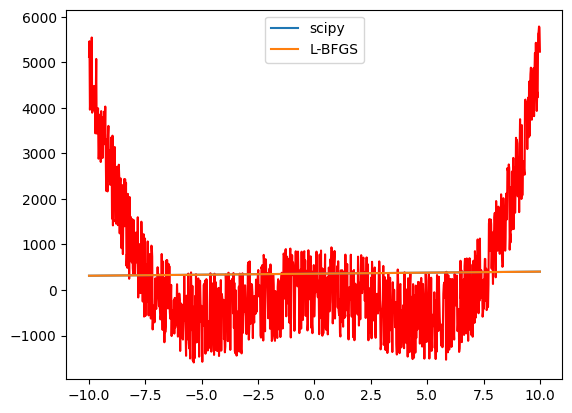

In [38]:
plt.plot(test.X, test.Y, 'r-')
plt.plot(X, func(X)(result_lbfgs.x), label='scipy')
plt.plot(X, func(X)(res['L-BFGS'][0]), label='L-BFGS')
plt.legend()

In [39]:
fun(result_lbfgs.x)

2138238130.155045

In [40]:
fun(res['L-BFGS'][0])

2138238130.1550465

In [41]:
start_time = time.time()
tracemalloc.start()
other_lbfgs = minimize(fun,
                      x0,
                      method='L-BFGS-B',
                      jac=grad,
                      bounds=((-10000., 10000.) for i in range(len(x0))))
end_time = time.time()
memory = tracemalloc.get_traced_memory()
tracemalloc.stop()

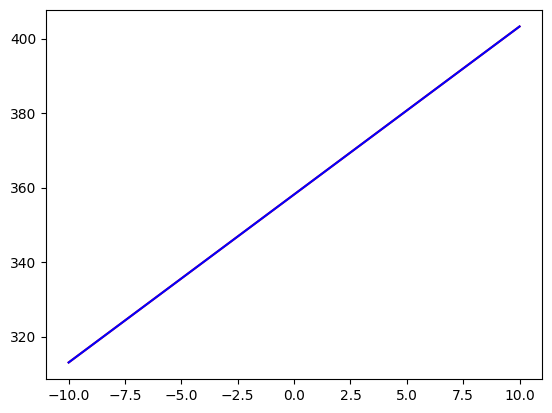

In [42]:
util.show(X, func(X)(result_lbfgs.x), X, func(X)(other_lbfgs.x))

In [43]:
end_time - start_time, memory, other_lbfgs

(0.006015300750732422,
 (14462, 49407),
   message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
   success: True
    status: 0
       fun: 2138238130.1550486
         x: [ 4.509e+00  3.581e+02]
       nit: 3
       jac: [-6.193e-08  4.107e-09]
      nfev: 6
      njev: 6
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>)

In [44]:
import torch

def f(point):
    x, y = point[0], point[1]
    return x ** 2 - x * y + y ** 2 + 9 * x - 6 * y + 20

def gradient(point):
    x, y = point[0], point[1]
    return np.array([2 * x - y + 9, -x + 2 * y - 6])

pt = [1., 0.]
betta0 = torch.tensor(pt, requires_grad=True)

In [45]:
betta0

tensor([1., 0.], requires_grad=True)

In [46]:
y = f(betta0)

In [47]:
y

tensor(30., grad_fn=<AddBackward0>)

In [48]:
y.backward()

In [49]:
betta0.grad

tensor([11., -7.])

In [50]:
gradient(betta0.detach().numpy())

array([11., -7.])

In [51]:
import gradient

In [52]:
gradient.analytic(f, dim=2)(pt)

array([11.0000000000000, -7.00000000000000], dtype=object)

In [53]:
gradient.calc(f)(pt)

array([11.0001, -6.9999])

In [54]:
def polynom(params):
    return (lambda point: sum(params[i] * point[i] ** 2 for i in range(len(point))),
            lambda point: np.array([2 * params[i] * point[i] for i in range(len(point))]))

In [55]:
import time

def test(func, grad, point):
    def run(calc_grad_func_name, calc_grad_func):
        start_time = time.time()
        tracemalloc.start()
        g = calc_grad_func()
        end_time = time.time()
        memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        
        print()
        print(calc_grad_func_name)
        print("time:", end_time - start_time)
        print("memory:", memory)
        print("error:", sum((grad(point) - g) ** 2))
    
    def calc_torch():
        betta0 = torch.tensor(point, requires_grad=True)
        y = func(betta0)
        y.backward()
        tor = betta0.grad.detach().numpy()
        return tor
    dim = len(point)
    
    methods = {
        'torch': calc_torch,
        'calculate': lambda *args: gradient.calc(func)(point),
        'hardcode': lambda *args: grad(point),
        'sympy analys': lambda *args: gradient.analytic(func, dim)(point)
    }
    
    for name in methods:
        run(name, methods[name])
    

In [56]:
dim = 200
f, g = polynom([random.randint(-100, 100000) for i in range(dim)])
test(f, g, [1. for i in range(dim)])


torch
time: 0.015063285827636719
memory: (628, 15332)
error: 0.0

calculate
time: 0.06485247611999512
memory: (1696, 12144)
error: 6619.857664780286

hardcode
time: 0.0
memory: (4096, 5760)
error: 0.0

sympy analys
time: 15.43122410774231
memory: (3534175, 3702963)
error: 0
